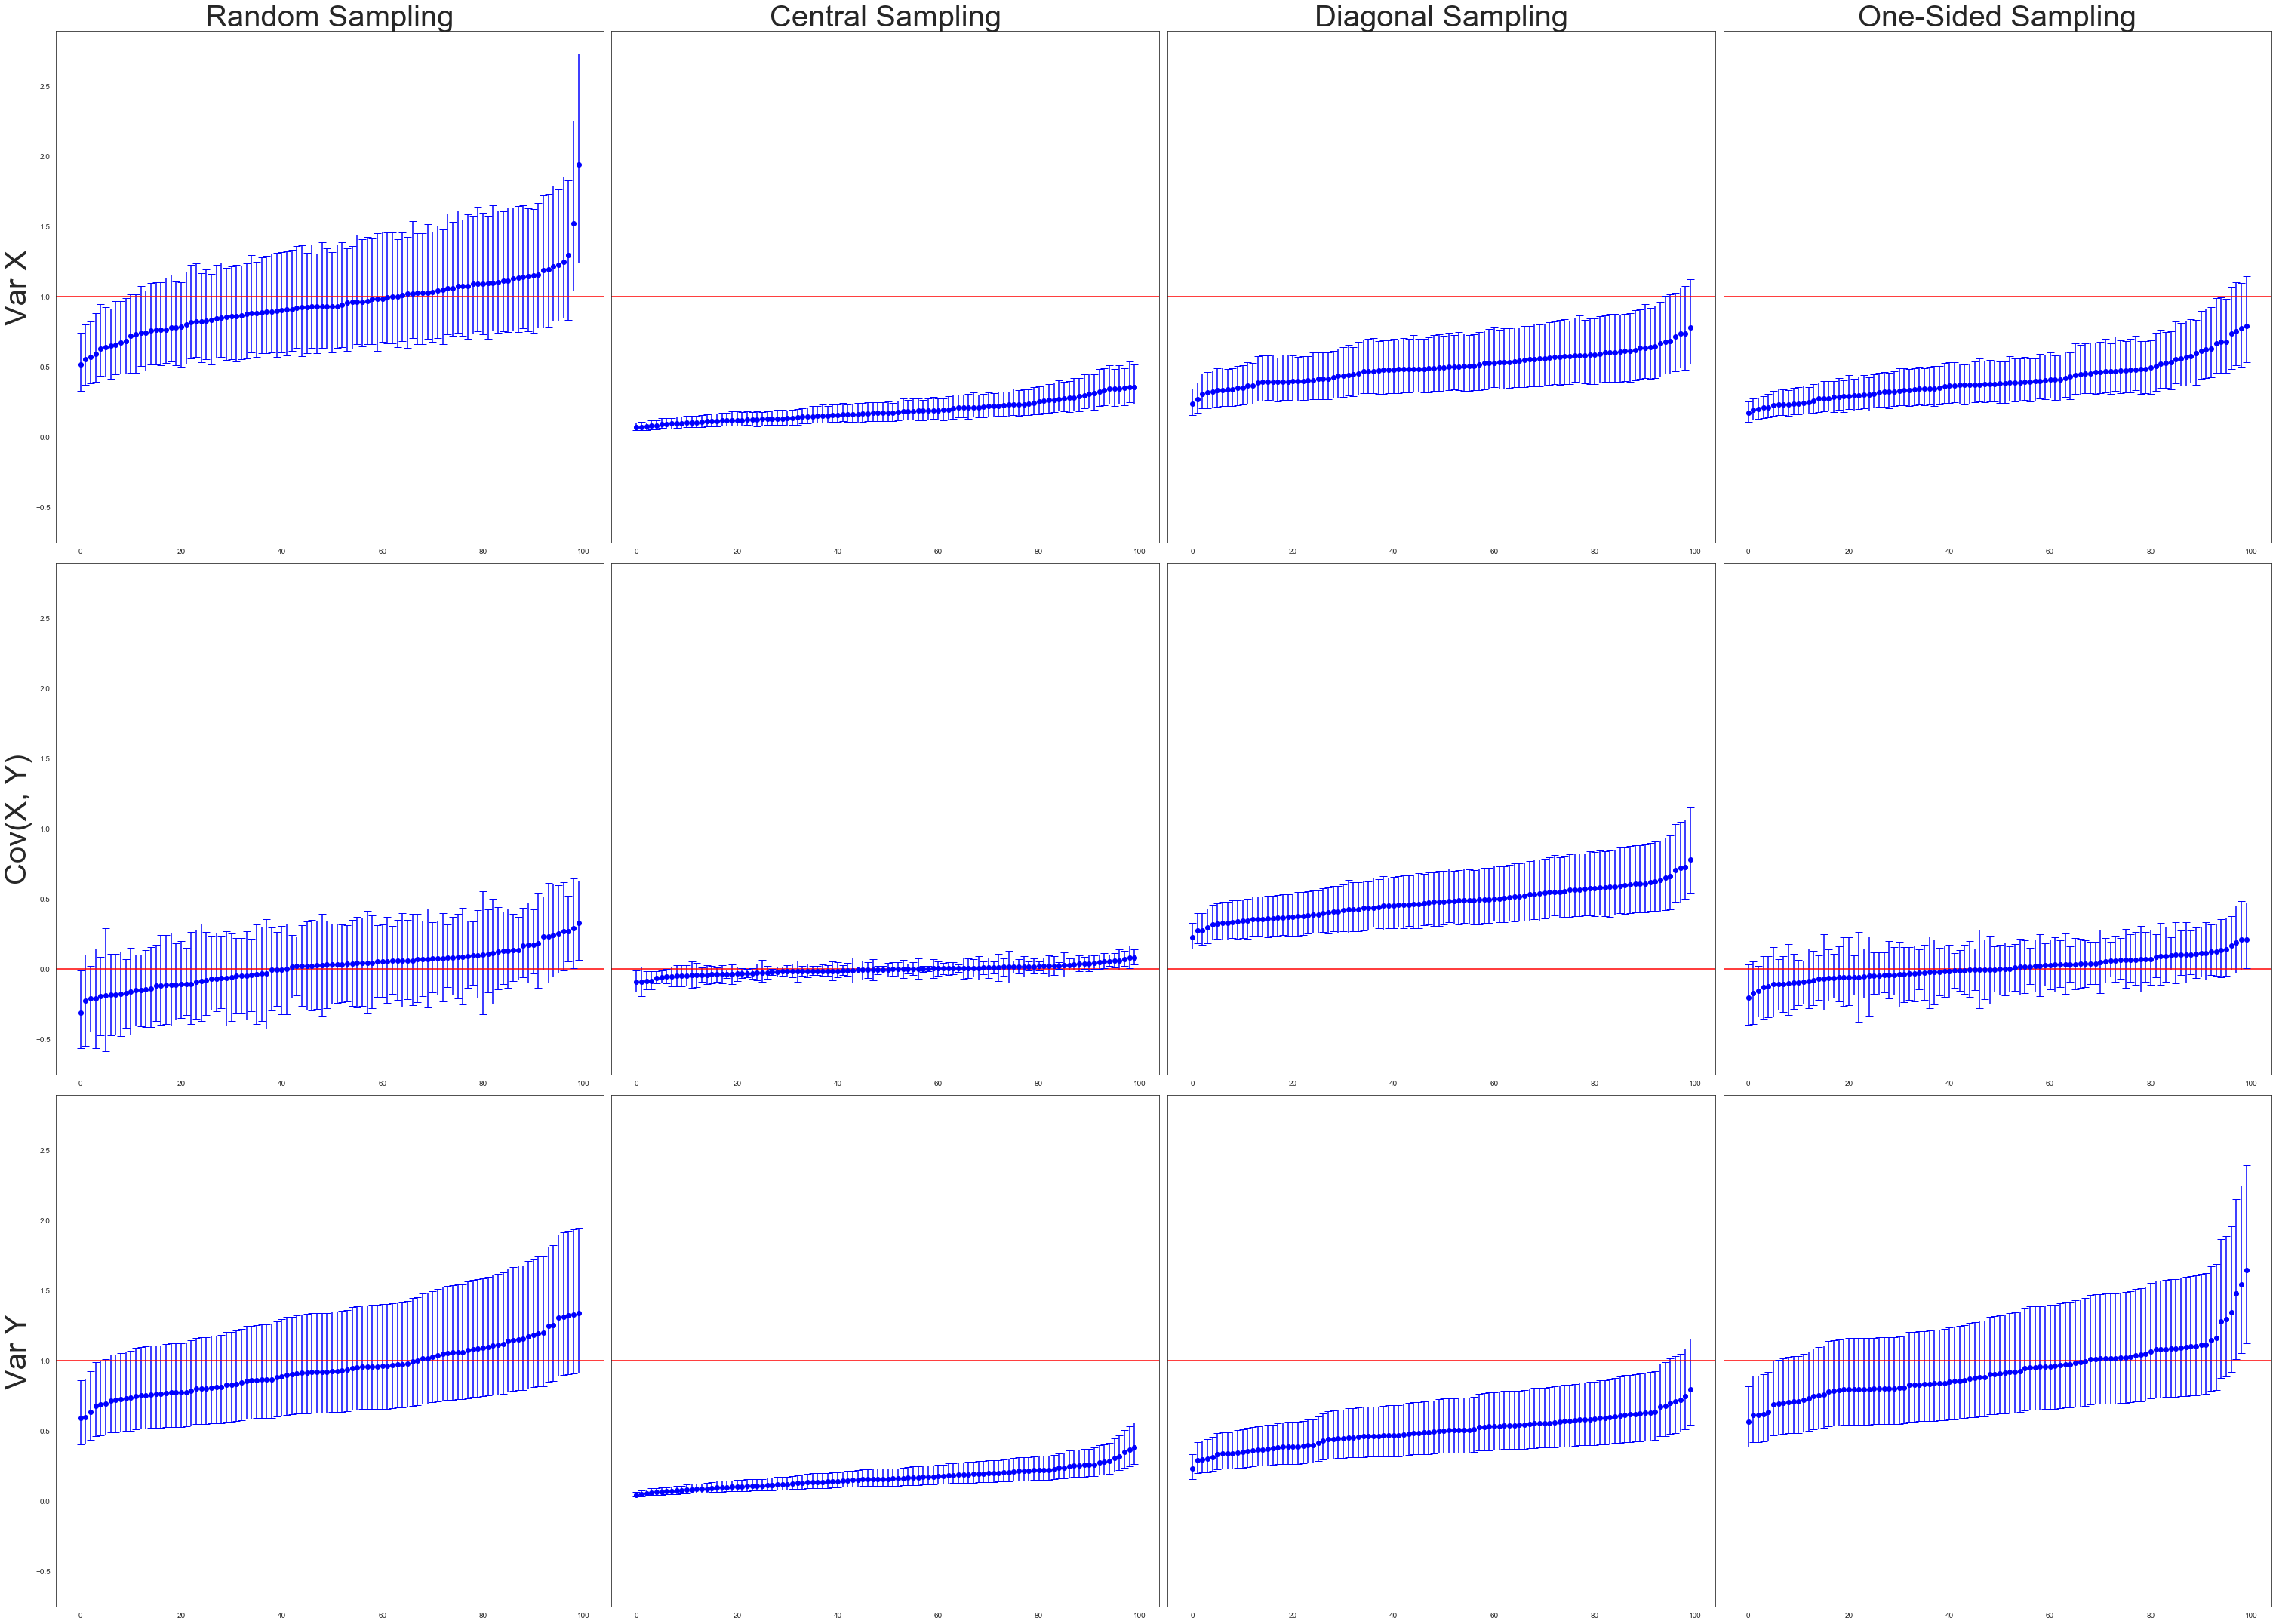

In [5]:
import pymc3
import pandas as pd
import numpy as np
import dendropy
#import simulation
import matplotlib.pyplot as plt
import math

import seaborn as sns

burnin = 100

sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(42, 30), sharey = True)


num_simulations = 100



output_index = 1
x=np.zeros(num_simulations)

sigma11 = np.zeros(num_simulations)
sigma12 = np.zeros(num_simulations)
sigma22 = np.zeros(num_simulations)

yerr_low11 = np.zeros(num_simulations)
yerr_low12 = np.zeros(num_simulations)
yerr_low22 = np.zeros(num_simulations)

yerr_up11 = np.zeros(num_simulations)
yerr_up12 = np.zeros(num_simulations)
yerr_up22 = np.zeros(num_simulations)

for i in range(num_simulations):
    x[i]=i
    data=pd.read_csv(filepath_or_buffer="output/beast/sampled"+str(output_index)+"/beast_output/beast"+str(i)+".log.txt", sep='\t', skiprows=[0,1, 2])
    data = data.iloc[burnin:]
    tree_length=data["treeLength"].iloc[0]
    #print(str(tree_length)+" "+str(data["treeLength"].iloc[0]))
    sigma11[i] = data["location.varCovar.location.precision.col11"].median()/tree_length
    sigma12[i] = data["location.varCovar.location.precision.col12"].median()/tree_length
    sigma22[i] = data["location.varCovar.location.precision.col22"].median()/tree_length
    interval11 = pymc3.stats.hpd(data["location.varCovar.location.precision.col11"].to_numpy(), alpha=0.05)
    interval12 = pymc3.stats.hpd(data["location.varCovar.location.precision.col12"].to_numpy(), alpha=0.05)
    interval22 = pymc3.stats.hpd(data["location.varCovar.location.precision.col22"].to_numpy(), alpha=0.05)
    #interval2 = pymc3.stats.quantiles
    #print(interval)
    low11=interval11[0]/tree_length
    up=interval11[1]/tree_length
    
    yerr_low11[i]=sigma11[i]-interval11[0]/tree_length
    yerr_up11[i]=interval11[1]/tree_length-sigma11[i]
    
    yerr_low12[i]=sigma12[i]-interval12[0]/tree_length
    yerr_up12[i]=interval12[1]/tree_length-sigma12[i]  
    
    yerr_low22[i]=sigma22[i]-interval22[0]/tree_length
    yerr_up22[i]=interval22[1]/tree_length-sigma22[i]

ax = axs[0, output_index-1]
ax.axhline(1, color='red')
[_, caps, _] =ax.errorbar(x, sigma11[sigma11.argsort()], yerr=[yerr_low11[sigma11.argsort()],yerr_up11[sigma11.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')    
    
ax = axs[1, output_index-1]
ax.axhline(0, color='red')
[_, caps, _] =ax.errorbar(x, sigma12[sigma12.argsort()], yerr=[yerr_low12[sigma12.argsort()],yerr_up12[sigma12.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')   
    
ax = axs[2, output_index-1]
ax.axhline(1, color='red')
[_, caps, _] =ax.errorbar(x, sigma22[sigma22.argsort()], yerr=[yerr_low22[sigma22.argsort()],yerr_up22[sigma22.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')
    
    
    
   ############## 
   ########## 
    
    
output_index = 2
x=np.zeros(num_simulations)

sigma11 = np.zeros(num_simulations)
sigma12 = np.zeros(num_simulations)
sigma22 = np.zeros(num_simulations)

yerr_low11 = np.zeros(num_simulations)
yerr_low12 = np.zeros(num_simulations)
yerr_low22 = np.zeros(num_simulations)

yerr_up11 = np.zeros(num_simulations)
yerr_up12 = np.zeros(num_simulations)
yerr_up22 = np.zeros(num_simulations)

for i in range(num_simulations):
    x[i]=i
    data=pd.read_csv(filepath_or_buffer="output/beast/sampled"+str(output_index)+"/beast_output/beast"+str(i)+".log.txt", sep='\t', skiprows=[0,1, 2])
    data = data.iloc[burnin:]
    tree_length=data["treeLength"].iloc[0]
    sigma11[i] = data["location.varCovar.location.precision.col11"].median()/tree_length
    sigma12[i] = data["location.varCovar.location.precision.col12"].median()/tree_length
    sigma22[i] = data["location.varCovar.location.precision.col22"].median()/tree_length
    interval11 = pymc3.stats.hpd(data["location.varCovar.location.precision.col11"].to_numpy(), alpha=0.05)
    interval12 = pymc3.stats.hpd(data["location.varCovar.location.precision.col12"].to_numpy(), alpha=0.05)
    interval22 = pymc3.stats.hpd(data["location.varCovar.location.precision.col22"].to_numpy(), alpha=0.05)
    #interval2 = pymc3.stats.quantiles
    #print(interval)
    low11=interval11[0]/tree_length
    up=interval11[1]/tree_length
    
    yerr_low11[i]=sigma11[i]-interval11[0]/tree_length
    yerr_up11[i]=interval11[1]/tree_length-sigma11[i]
    
    yerr_low12[i]=sigma12[i]-interval12[0]/tree_length
    yerr_up12[i]=interval12[1]/tree_length-sigma12[i]  
    
    yerr_low22[i]=sigma22[i]-interval22[0]/tree_length
    yerr_up22[i]=interval22[1]/tree_length-sigma22[i]

ax = axs[0, output_index-1]
ax.axhline(1, color='red')
[_, caps, _] =ax.errorbar(x, sigma11[sigma11.argsort()], yerr=[yerr_low11[sigma11.argsort()],yerr_up11[sigma11.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')    
    
ax = axs[1, output_index-1]
ax.axhline(0, color='red')
[_, caps, _] =ax.errorbar(x, sigma12[sigma12.argsort()], yerr=[yerr_low12[sigma12.argsort()],yerr_up12[sigma12.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')   
    
ax = axs[2, output_index-1]
ax.axhline(1, color='red')
[_, caps, _] =ax.errorbar(x, sigma22[sigma22.argsort()], yerr=[yerr_low22[sigma22.argsort()],yerr_up22[sigma22.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')
    
    
       ############## 
   ########## 
    
    
output_index = 3
x=np.zeros(num_simulations)

sigma11 = np.zeros(num_simulations)
sigma12 = np.zeros(num_simulations)
sigma22 = np.zeros(num_simulations)

yerr_low11 = np.zeros(num_simulations)
yerr_low12 = np.zeros(num_simulations)
yerr_low22 = np.zeros(num_simulations)

yerr_up11 = np.zeros(num_simulations)
yerr_up12 = np.zeros(num_simulations)
yerr_up22 = np.zeros(num_simulations)

for i in range(num_simulations):
    x[i]=i
    data=pd.read_csv(filepath_or_buffer="output/beast/sampled"+str(output_index)+"/beast_output/beast"+str(i)+".log.txt", sep='\t', skiprows=[0,1, 2])
    data = data.iloc[burnin:]
    tree_length=data["treeLength"].iloc[0]
    sigma11[i] = data["location.varCovar.location.precision.col11"].median()/tree_length
    sigma12[i] = data["location.varCovar.location.precision.col12"].median()/tree_length
    sigma22[i] = data["location.varCovar.location.precision.col22"].median()/tree_length
    interval11 = pymc3.stats.hpd(data["location.varCovar.location.precision.col11"].to_numpy(), alpha=0.05)
    interval12 = pymc3.stats.hpd(data["location.varCovar.location.precision.col12"].to_numpy(), alpha=0.05)
    interval22 = pymc3.stats.hpd(data["location.varCovar.location.precision.col22"].to_numpy(), alpha=0.05)
    #interval2 = pymc3.stats.quantiles
    #print(interval)
    low11=interval11[0]/tree_length
    up=interval11[1]/tree_length
    
    yerr_low11[i]=sigma11[i]-interval11[0]/tree_length
    yerr_up11[i]=interval11[1]/tree_length-sigma11[i]
    
    yerr_low12[i]=sigma12[i]-interval12[0]/tree_length
    yerr_up12[i]=interval12[1]/tree_length-sigma12[i]  
    
    yerr_low22[i]=sigma22[i]-interval22[0]/tree_length
    yerr_up22[i]=interval22[1]/tree_length-sigma22[i]

ax = axs[0, output_index-1]
ax.axhline(1, color='red')
[_, caps, _] =ax.errorbar(x, sigma11[sigma11.argsort()], yerr=[yerr_low11[sigma11.argsort()],yerr_up11[sigma11.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')    
    
ax = axs[1, output_index-1]
ax.axhline(0, color='red')
[_, caps, _] =ax.errorbar(x, sigma12[sigma12.argsort()], yerr=[yerr_low12[sigma12.argsort()],yerr_up12[sigma12.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')   
    
ax = axs[2, output_index-1]
ax.axhline(1, color='red')
[_, caps, _] =ax.errorbar(x, sigma22[sigma22.argsort()], yerr=[yerr_low22[sigma22.argsort()],yerr_up22[sigma22.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')
    
    
       ############## 
   ########## 
 
    
output_index = 4
x=np.zeros(num_simulations)

sigma11 = np.zeros(num_simulations)
sigma12 = np.zeros(num_simulations)
sigma22 = np.zeros(num_simulations)

yerr_low11 = np.zeros(num_simulations)
yerr_low12 = np.zeros(num_simulations)
yerr_low22 = np.zeros(num_simulations)

yerr_up11 = np.zeros(num_simulations)
yerr_up12 = np.zeros(num_simulations)
yerr_up22 = np.zeros(num_simulations)

for i in range(num_simulations):
    x[i]=i
    data=pd.read_csv(filepath_or_buffer="output/beast/sampled"+str(output_index)+"/beast_output/beast"+str(i)+".log.txt", sep='\t', skiprows=[0,1, 2])
    data = data.iloc[burnin:]
    tree_length=data["treeLength"].iloc[0]
    sigma11[i] = data["location.varCovar.location.precision.col11"].median()/tree_length
    sigma12[i] = data["location.varCovar.location.precision.col12"].median()/tree_length
    sigma22[i] = data["location.varCovar.location.precision.col22"].median()/tree_length
    interval11 = pymc3.stats.hpd(data["location.varCovar.location.precision.col11"].to_numpy(), alpha=0.05)
    interval12 = pymc3.stats.hpd(data["location.varCovar.location.precision.col12"].to_numpy(), alpha=0.05)
    interval22 = pymc3.stats.hpd(data["location.varCovar.location.precision.col22"].to_numpy(), alpha=0.05)
    #interval2 = pymc3.stats.quantiles
    #print(interval)
    low11=interval11[0]/tree_length
    up=interval11[1]/tree_length
    
    yerr_low11[i]=sigma11[i]-interval11[0]/tree_length
    yerr_up11[i]=interval11[1]/tree_length-sigma11[i]
    
    yerr_low12[i]=sigma12[i]-interval12[0]/tree_length
    yerr_up12[i]=interval12[1]/tree_length-sigma12[i]  
    
    yerr_low22[i]=sigma22[i]-interval22[0]/tree_length
    yerr_up22[i]=interval22[1]/tree_length-sigma22[i]

ax = axs[0, output_index-1]
ax.axhline(1, color='red')
[_, caps, _] =ax.errorbar(x, sigma11[sigma11.argsort()], yerr=[yerr_low11[sigma11.argsort()],yerr_up11[sigma11.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')    
    
ax = axs[1, output_index-1]
ax.axhline(0, color='red')
[_, caps, _] =ax.errorbar(x, sigma12[sigma12.argsort()], yerr=[yerr_low12[sigma12.argsort()],yerr_up12[sigma12.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')   
    
ax = axs[2, output_index-1]
ax.axhline(1, color='red')
[_, caps, _] =ax.errorbar(x, sigma22[sigma22.argsort()], yerr=[yerr_low22[sigma22.argsort()],yerr_up22[sigma22.argsort()]], fmt='ob', capsize=5)
for cap in caps:
    cap.set_color('b')
    
    #########
    ########

    
for ax, col in zip(axs[0,:], ['Random Sampling', 'Central Sampling', 'Diagonal Sampling', 'One-Sided Sampling']):
    ax.set_title(col, size=40)
for ax, row in zip(axs[:,0], ['Var X', 'Cov(X, Y)', 'Var Y']):
    ax.set_ylabel(row, size=40)    

fig.tight_layout()
plt.savefig('2dim_variances.png')
plt.show()


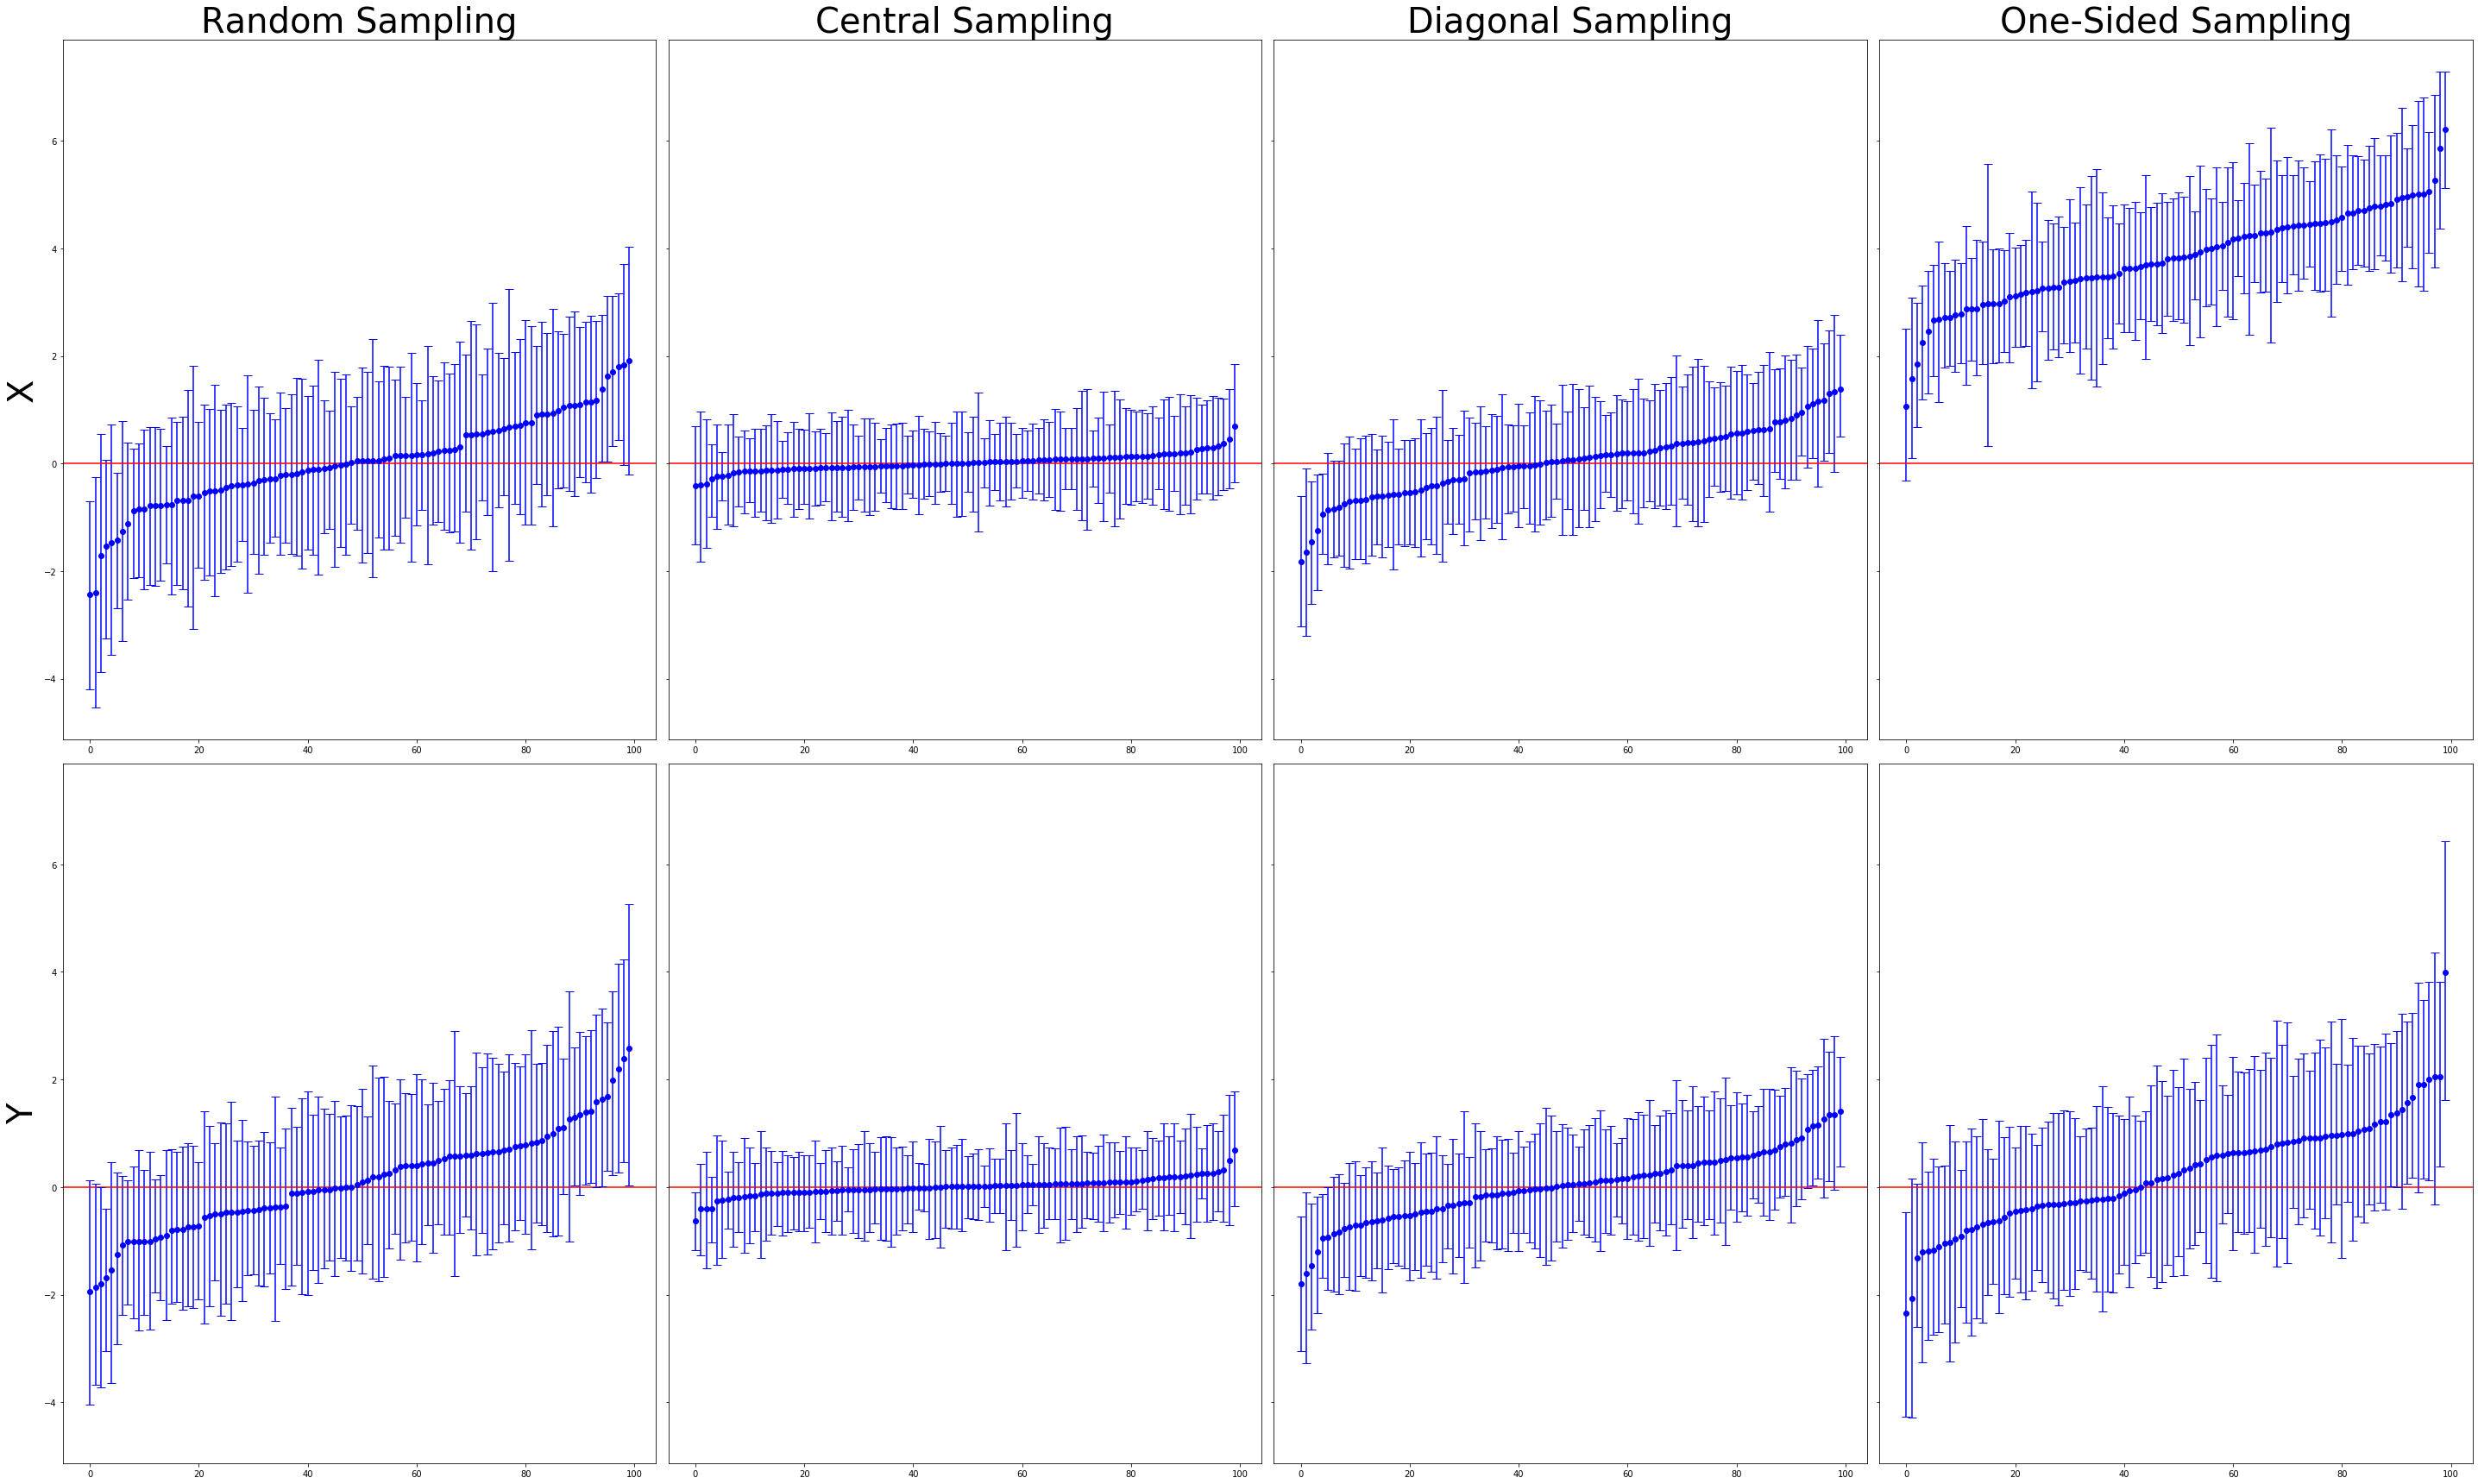

In [2]:
import pymc3
import pandas as pd
import numpy as np
import dendropy
#import simulation
import matplotlib.pyplot as plt
import math

# def read_root(file_string, burnin):
#     #print("begin reading")
#     f = open(file_string, "r")
#     location_X=[]
#     location_Y=[]
#     index = 0
    

#     for line in f:
#         if line.startswith("tree"):
# #             print(line[-46:-4])
#             start_index1=0
#             end_index1=0
#             start_index2=4
#             end_index2=4
#             for i in range(0,100):
#                 if line[-i]==',':
#                     start_index2=i-1
#                     end_index1=i
#                 if line[-i]=='{':
#                     start_index1=i-1
#                     break
#             location_X.append(float(line[-start_index1:-end_index1]))
#             location_Y.append(float(line[-start_index2:-end_index2]))
#         index=index+1
        
#     f.close()  
#     #print("end reading")
#     location_X=location_X[burnin:]
#     location_Y=location_Y[burnin:]
#     location_X=np.asarray(location_X)
#     location_Y=np.asarray(location_Y)
#     #print(np.mean(location_X))
#     return np.median(location_X), np.median(location_Y), pymc3.hpd(location_X, alpha=0.05), pymc3.hpd(location_Y, alpha=0.05)

def get_root_data(output_index, i):
    file = open('output/c_beast/sampled'+str(output_index)+'/root_data/actual_root'+str(i)+'.txt',"r")
    real_X = float(file.readline())
    real_Y = float(file.readline())
    file.close()
    data = pd.read_csv('output/c_beast/sampled'+str(output_index)+'/root_data/observed_roots'+str(i)+'.txt', delimiter='\t', header=None, names=['X', 'Y'])
    data = data.iloc[burnin:]
    
    return real_X, real_Y, data["X"].median(), data["Y"].median(), pymc3.stats.hpd(data["X"].to_numpy(), alpha=0.05), pymc3.stats.hpd(data["Y"].to_numpy(), alpha=0.05)


burnin = 100
num_simulations = 100
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(40, 24), sharey=True)



for output_index in [1, 2, 3, 4]:
    #print(output_index)
    x = np.zeros(num_simulations)
    y = np.zeros(num_simulations)
    xerr_low = np.zeros(num_simulations)
    xerr_up = np.zeros(num_simulations)
    yerr_low = np.zeros(num_simulations)
    yerr_up = np.zeros(num_simulations)
    for i in range(num_simulations):

        #tree = annotated_tree=dendropy.Tree.get(path='uc_data\\annotated_sampled_trees\\sampled_beast'+str(i)+'.tree.txt', extract_comment_metadata=True, suppress_internal_node_taxa=False, schema="nexus")

        #real_X, real_Y=read_single_root('output/beast/sampled'+str(output_index)+'/generated_trees/tree'+str(i)+'.txt')

        real_X, real_Y, median_X, median_Y, hpd_X, hpd_Y = get_root_data(output_index, i)
        y[i]=median_Y-real_Y
        yerr_low[i]=median_Y-hpd_Y[0]
        yerr_up[i]=hpd_Y[1]-median_Y

        x[i]=median_X-real_X
        xerr_low[i]=median_X-hpd_X[0]
        xerr_up[i]=hpd_X[1]-median_X

    ax = axs[0, output_index-1]  
    ax.axhline(0, color='red')
    [_, caps, _] =ax.errorbar(range(0,num_simulations), x[x.argsort()], yerr=[xerr_low[x.argsort()],xerr_up[x.argsort()]], fmt='ob', capsize=5)
    for cap in caps:
        cap.set_color('b')

    ax = axs[1, output_index-1]  
    ax.axhline(0, color='red')
    [_, caps, _] =ax.errorbar(range(0,num_simulations), y[y.argsort()], yerr=[yerr_low[y.argsort()],yerr_up[y.argsort()]], fmt='ob', capsize=5)

    for cap in caps:
        cap.set_color('b')

for ax, col in zip(axs[0,:], ['Random Sampling', 'Central Sampling', 'Diagonal Sampling', 'One-Sided Sampling']):
    ax.set_title(col, size=40)
for ax, row in zip(axs[:,0], ['X', 'Y']):
    ax.set_ylabel(row, size=40)  
    
fig.tight_layout()
plt.savefig("2dim_root_positions.png")    
plt.show()

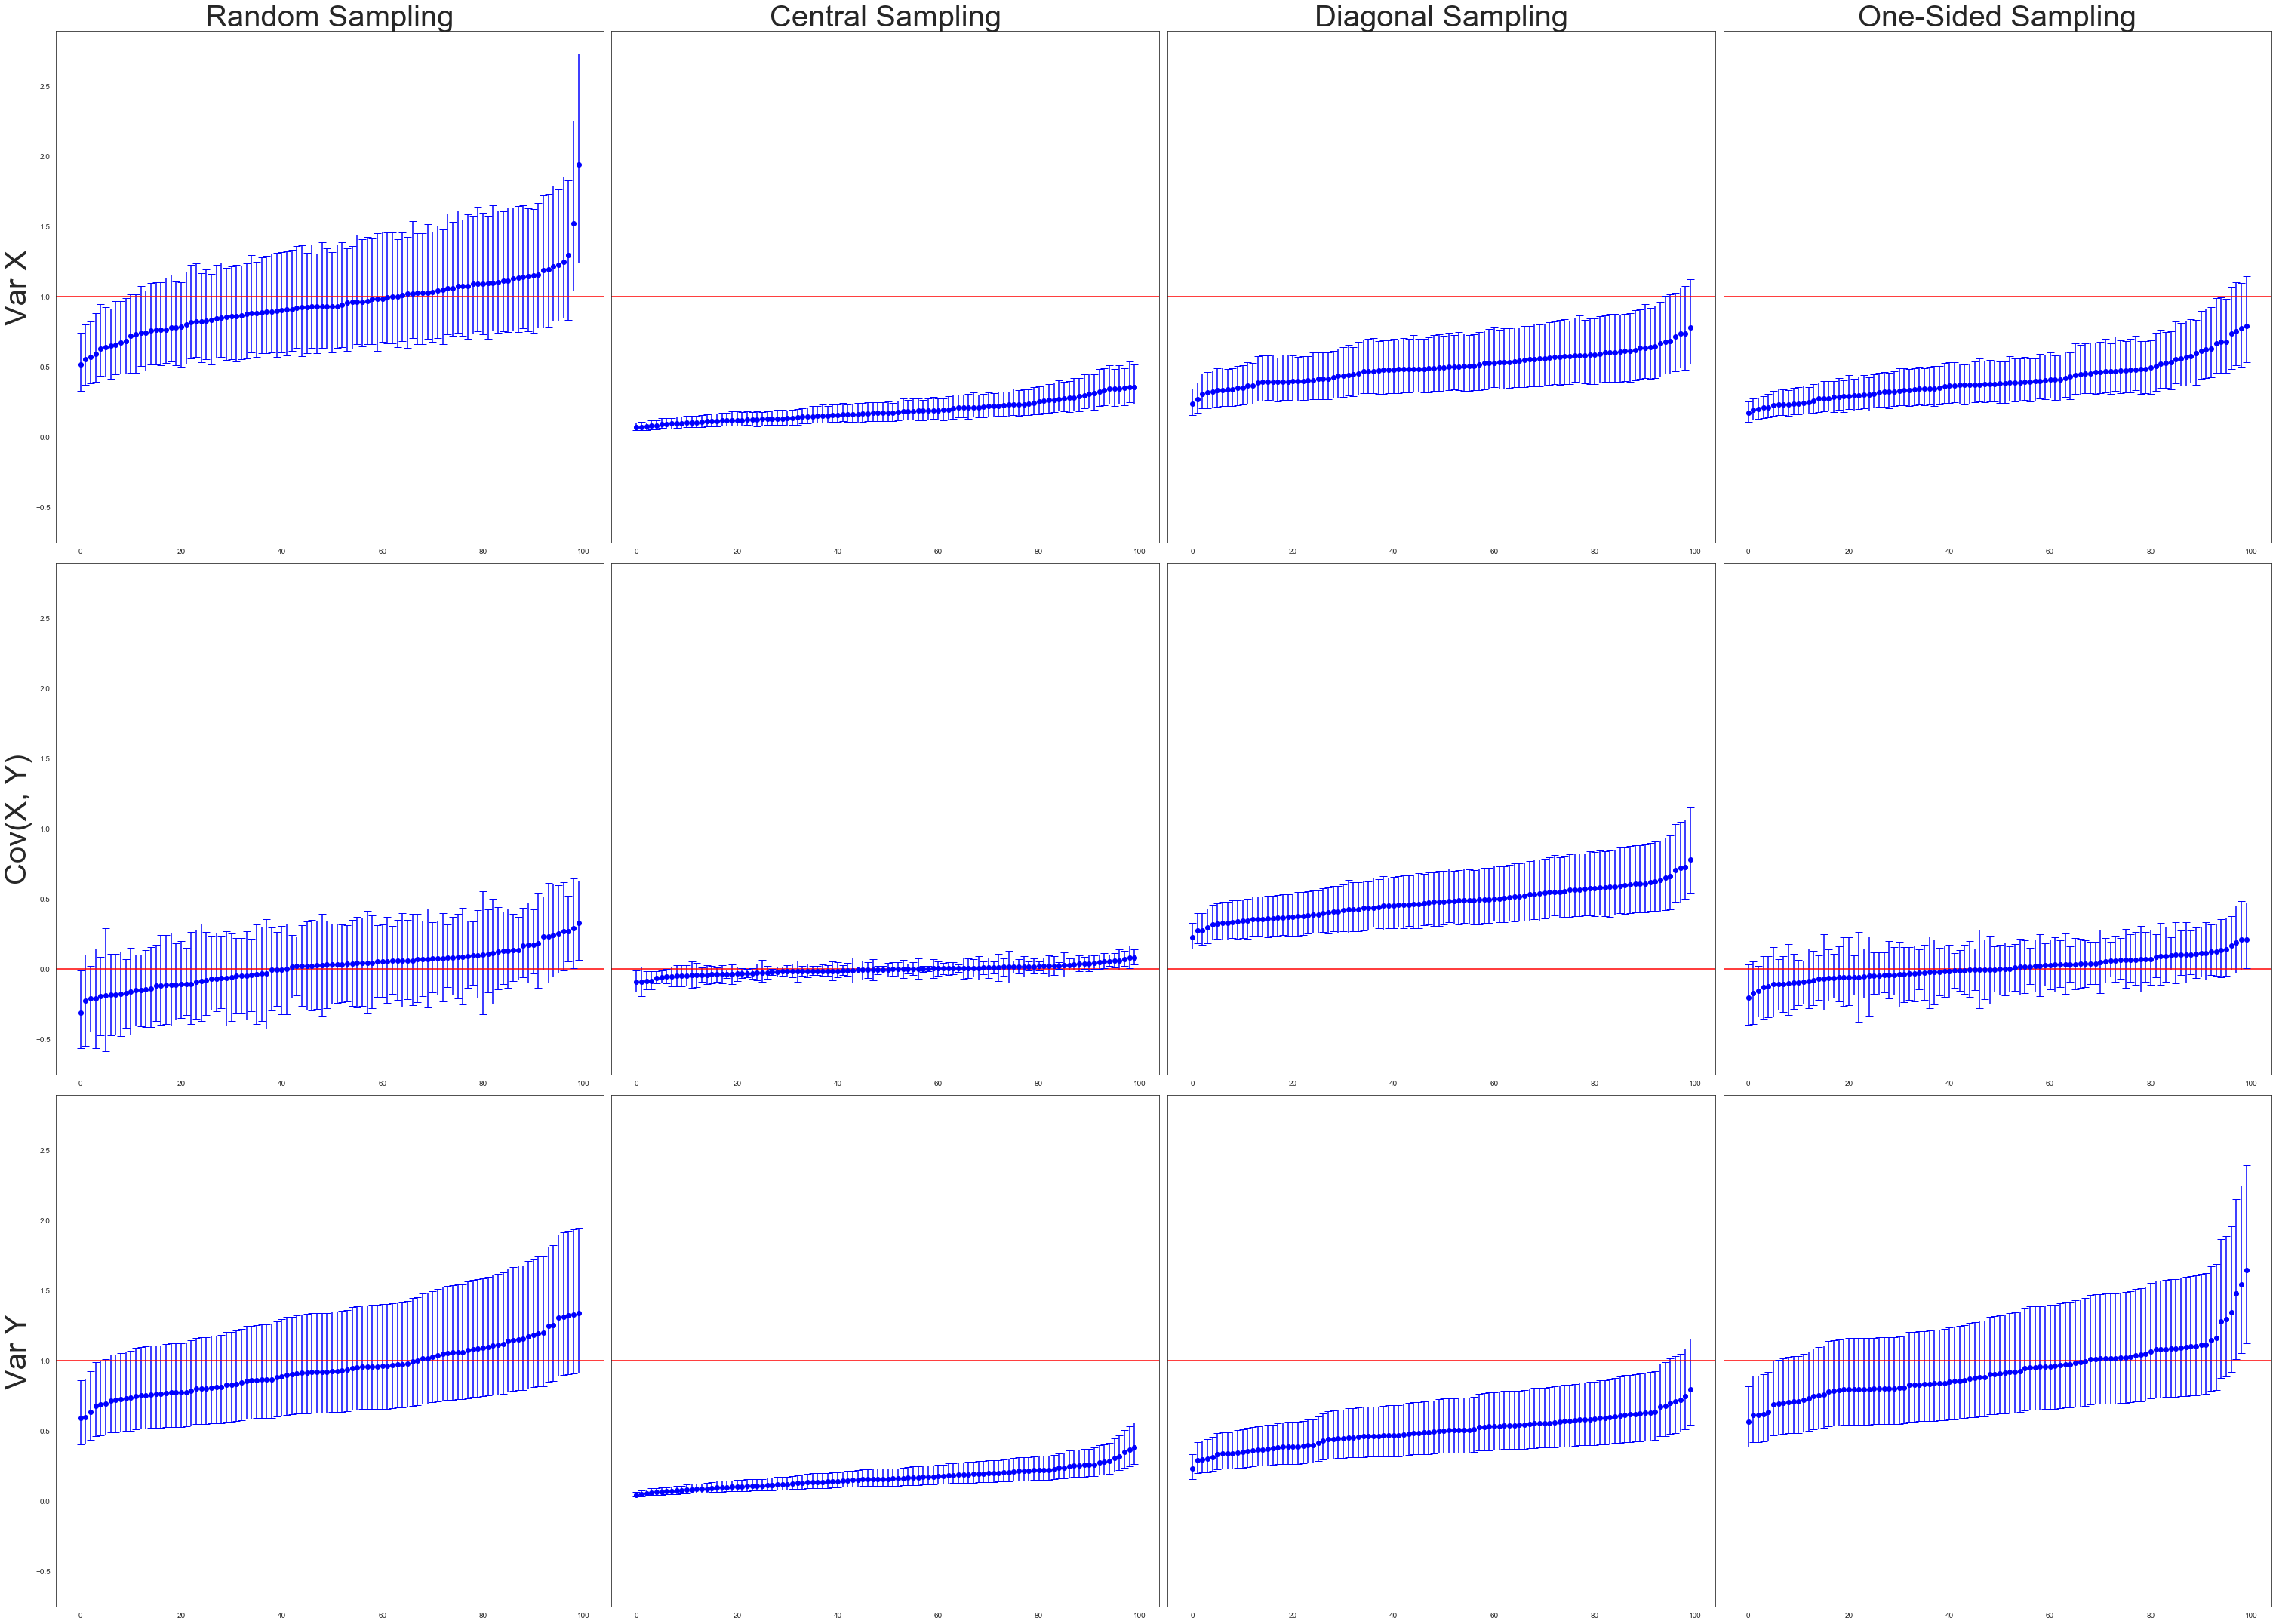

In [6]:
import pymc3
import pandas as pd
import numpy as np
import dendropy
#import simulation
import matplotlib.pyplot as plt
import math

import seaborn as sns

burnin = 100

sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(42, 30), sharey = True)


num_simulations = 100



for output_index in range(1,5):

    x=np.zeros(num_simulations)

    sigma11 = np.zeros(num_simulations)
    sigma12 = np.zeros(num_simulations)
    sigma22 = np.zeros(num_simulations)

    yerr_low11 = np.zeros(num_simulations)
    yerr_low12 = np.zeros(num_simulations)
    yerr_low22 = np.zeros(num_simulations)

    yerr_up11 = np.zeros(num_simulations)
    yerr_up12 = np.zeros(num_simulations)
    yerr_up22 = np.zeros(num_simulations)

    for i in range(num_simulations):
        x[i]=i
        data=pd.read_csv(filepath_or_buffer="output/beast/sampled"+str(output_index)+"/beast_output/beast"+str(i)+".log.txt", sep='\t', skiprows=[0,1, 2])
        data = data.iloc[burnin:]
        tree_length=data["treeLength"].iloc[0]
        #print(str(tree_length)+" "+str(data["treeLength"].iloc[0]))
        sigma11[i] = data["location.varCovar.location.precision.col11"].median()/tree_length
        sigma12[i] = data["location.varCovar.location.precision.col12"].median()/tree_length
        sigma22[i] = data["location.varCovar.location.precision.col22"].median()/tree_length
        interval11 = pymc3.stats.hpd(data["location.varCovar.location.precision.col11"].to_numpy(), alpha=0.05)
        interval12 = pymc3.stats.hpd(data["location.varCovar.location.precision.col12"].to_numpy(), alpha=0.05)
        interval22 = pymc3.stats.hpd(data["location.varCovar.location.precision.col22"].to_numpy(), alpha=0.05)
        #interval2 = pymc3.stats.quantiles
        #print(interval)
        low11=interval11[0]/tree_length
        up=interval11[1]/tree_length

        yerr_low11[i]=sigma11[i]-interval11[0]/tree_length
        yerr_up11[i]=interval11[1]/tree_length-sigma11[i]

        yerr_low12[i]=sigma12[i]-interval12[0]/tree_length
        yerr_up12[i]=interval12[1]/tree_length-sigma12[i]  

        yerr_low22[i]=sigma22[i]-interval22[0]/tree_length
        yerr_up22[i]=interval22[1]/tree_length-sigma22[i]

    ax = axs[0, output_index-1]
    ax.axhline(1, color='red')
    [_, caps, _] =ax.errorbar(x, sigma11[sigma11.argsort()], yerr=[yerr_low11[sigma11.argsort()],yerr_up11[sigma11.argsort()]], fmt='ob', capsize=5)
    for cap in caps:
        cap.set_color('b')    

    ax = axs[1, output_index-1]
    ax.axhline(0, color='red')
    [_, caps, _] =ax.errorbar(x, sigma12[sigma12.argsort()], yerr=[yerr_low12[sigma12.argsort()],yerr_up12[sigma12.argsort()]], fmt='ob', capsize=5)
    for cap in caps:
        cap.set_color('b')   

    ax = axs[2, output_index-1]
    ax.axhline(1, color='red')
    [_, caps, _] =ax.errorbar(x, sigma22[sigma22.argsort()], yerr=[yerr_low22[sigma22.argsort()],yerr_up22[sigma22.argsort()]], fmt='ob', capsize=5)
    for cap in caps:
        cap.set_color('b')

    
for ax, col in zip(axs[0,:], ['Random Sampling', 'Central Sampling', 'Diagonal Sampling', 'One-Sided Sampling']):
    ax.set_title(col, size=40)
for ax, row in zip(axs[:,0], ['Var X', 'Cov(X, Y)', 'Var Y']):
    ax.set_ylabel(row, size=40)    

fig.tight_layout()
plt.savefig('2dim_variances.png')
plt.show()


In [13]:
#CHECKING DIFFUSION RATE



#discsimulation

import random
import math
import numpy as np

L = 100

mu = 0.1

r = 0.05
max_time=3

lambd = 2*L**2/(mu*math.pi*r**4)

def run_walk(L = 100, mu = 0.5, lambd = 1000000000, r = 0.1, max_time=1):
    
    #a particle starts at origin
    coord_x=0
    coord_y=0
    
    timer = 0
    
    # this is the rate at which the particle jumps
    rate = mu*lambd*math.pi*r**2/(L**2)

    while timer < max_time:
        jump_time = random.expovariate(rate)
        timer=timer+jump_time
        if timer > max_time:
            break
        
        #this is the possition of a disc relative to the particle
        disc_x = 0
        disc_y = 0
        
        #this is the jump position of the particle relativve to the discs
        jump_x = 0
        jump_y = 0
        
        #sampling position of the centre of the disc relative to the particle,
        #rejecting cases if the centre is not within ratius r of the particle
        while True:
            
            disc_x = random.uniform(-r, r)
            disc_y = random.uniform(-r, r)
            if disc_x**2+disc_y**2 <= r**2:
                break
        while True:
            jump_x = random.uniform(-r, r)
            jump_y = random.uniform(-r, r)
            if jump_x**2+jump_y**2 <= r**2:
                jump_x = jump_x + disc_x
                jump_y = jump_y +disc_y
                break;
        coord_x = coord_x + jump_x
        coord_y = coord_y + jump_y
    return coord_x**2+coord_y**2

num_simulations = 1000
samples = np.zeros(num_simulations)
for i in range(0, num_simulations):
    samples[i]=run_walk(L = L, mu = mu, lambd = lambd, r = r, max_time=max_time)


#print(samples.mean())

#this is the expected square displacement over the unit time
sigsq2 = mu*(lambd*r**4)*math.pi/(L**2)
print(sigsq2)

#this is the actual square displacement over the unit time
print(samples.mean()/(max_time))

2.0
2.0178178269367417
